# 데이터셋 개요
- 구성: 캘리포니아 주택 가격 데이터셋의 대표적인 속성으로, 주거 환경과 연관된 다양한 특성을 나타내는 단일 CSV 파일
- 변수 의미
  - longitude : 경도 (지구를 세로로 나누는 선(자오선))
  - latitude : 위도 (적도를 기준으로 지구를 가로로 나누는 평행선(위선))
  - housing_median_age : 주택 중위 연식(건축된 지 몇 년이 되었는지의 중위값)
  - total_rooms : 총 방 개수(구역 내 모든 주택의 방 개수 합)
  - total_bedrooms : 총 침실 개수(구역 내 모든 주택의 침실 개수 합)
  - population : 인구수(구역 내 전체 거주 인구)
  - households : 가구 수(구역 내 가구의 총 개수)
  - median_income : 중위 소득(구역 내 가구들의 소득 중위값, 단위는 1만 달러)
  - median_house_value : 주택의 중위 가격(구역 내 주택 가격 중위값, 달러 단위)
  - ocean_proximity : 바다와의 근접도(지리적 위치 특성, 예: NEAR BAY=만 근처)

# 1. 데이터 분석 시나리오

## 1) 문제 정의

- 질문: "소득 수준별 어느 지역에 살까?"
- 가설: "소득 수준이 높을 수록 바다 가까이 살 것이다."

## 2) 라이브러리와 데이터 불러오기

In [2]:
# 라이브러리 불러오기
import pandas as pd # 표 형태의 데이터 분석할 때
import numpy as np # 행렬, 다차원 계산 등 복잡한 연산할 때
import seaborn as sns # 시각화할 때
import matplotlib.pyplot as plt # 시각화할 때
from matplotlib.lines import Line2D # 중앙값 경향선 나타낼 때
from scipy import stats # 통계 분석과 검정할 때
from sklearn.preprocessing import OrdinalEncoder # 순서별 의미가 따로 있는 범주형 데이터를 라벨인코딩할 때
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 확인할 때
plt.rcParams['font.family'] = 'AppleGothic'

# 데이터 불러오기
df = pd.read_csv("housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# 2. 탐색적 데이터 분석(Exploratory Data Analysis, EDA)

## 1) 데이터 탐색 및 전처리
- 주요 변수 선택, 새로운 데이터 프레임 생성, 결측치 확인, 이상치 처리, 새로운 변수 생성, 기술통계 확인 등

In [4]:
# 데이터 개수 확인
df.shape

(20640, 10)

In [5]:
# total_bedrooms 결측치 확인, ocean_proximity 데이터 타입 object 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# 새로운 데이터 프레임(clean_df)에 주요 변수만 남기기
clean_df = df[['longitude','latitude','population','median_income','median_house_value','ocean_proximity']]
clean_df

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,565.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...
20635,-121.09,39.48,845.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,356.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,1007.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,741.0,1.8672,84700.0,INLAND


In [7]:
# 중복 없음 확인
print(clean_df.duplicated().sum())

0


In [8]:
# clean_df 정보 재확인
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   population          20640 non-null  float64
 3   median_income       20640 non-null  float64
 4   median_house_value  20640 non-null  float64
 5   ocean_proximity     20640 non-null  object 
dtypes: float64(5), object(1)
memory usage: 967.6+ KB


In [9]:
# 결측치 없음 확인
clean_df.isnull().sum()

longitude             0
latitude              0
population            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
# 편의상 위도/경도를 제외한 변수 타입을 int로 변환
for col in ['population', 'median_income', 'median_house_value']:
    clean_df[col] = clean_df[col].astype(int)

/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_4642/3597638302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].astype(int)
/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_4642/3597638302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].astype(int)
/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_4642/3597638302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [11]:
# 2~4 변수 타입이 int로 잘 바뀜
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   population          20640 non-null  int64  
 3   median_income       20640 non-null  int64  
 4   median_house_value  20640 non-null  int64  
 5   ocean_proximity     20640 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 967.6+ KB


In [12]:
clean_df

,longitude,latitude,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322,8,452600,NEAR BAY
1,-122.22,37.86,2401,8,358500,NEAR BAY
2,-122.24,37.85,496,7,352100,NEAR BAY
3,-122.25,37.85,558,5,341300,NEAR BAY
4,-122.25,37.85,565,3,342200,NEAR BAY
...,...,...,...,...,...,...
20635,-121.09,39.48,845,1,78100,INLAND
20636,-121.21,39.49,356,2,77100,INLAND
20637,-121.22,39.43,1007,1,92300,INLAND
20638,-121.32,39.43,741,1,84700,INLAND


In [13]:
# 유일한 object 타입인 ocean_proximity 고유값 목록 확인
print(df['ocean_proximity'].unique())

# 고유값들을 바닷가 근접한 순으로 나열하면 다음과 같음
# ISLAND: 섬 지역, 캘리포니아 내의 섬
# NEAR OCEAN: 바다 근처, 실제로 해변가에 매우 가까운 지역
# <1H OCEAN: 바다에서 차로 1시간 미만 거리의 지역, 바다로 쉽게 접근 가능한 내륙이나 해안 인근
# NEAR BAY: 만(Bay) 근처 지역, 특히 샌프란시스코 Bay Area처럼 만과 인접한 곳
# INLAND: 내륙 지역, 바다와 멀리 떨어진 곳

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [14]:
# 라벨 인코딩 - 편의상 ocean_proximity를 바다 근접한 순으로 0~4 숫자 부여 (숫자가 클수록 바닷가에서 멀다)
# 파생변수(ocean_label) 생성
categories = [['ISLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'INLAND']]
enc = OrdinalEncoder(categories=categories)
clean_df['ocean_label'] = enc.fit_transform(df[['ocean_proximity']]).astype(int)
clean_df

# 라벨 0: ISLAND
# 라벨 1: NEAR OCEAN (바다 근처)
# 라벨 2: <1H OCEAN (바다에서 차로 1시간 미만 거리의 지역)
# 라벨 3: NEAR BAY (만 근처 지역)
# 라벨 4: INLAND (내륙 지역, 바다와 멀리 떨어진 곳)

/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_4642/145386315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['ocean_label'] = enc.fit_transform(df[['ocean_proximity']]).astype(int)


,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_label
0,-122.23,37.88,322,8,452600,NEAR BAY,3
1,-122.22,37.86,2401,8,358500,NEAR BAY,3
2,-122.24,37.85,496,7,352100,NEAR BAY,3
3,-122.25,37.85,558,5,341300,NEAR BAY,3
4,-122.25,37.85,565,3,342200,NEAR BAY,3
...,...,...,...,...,...,...,...
20635,-121.09,39.48,845,1,78100,INLAND,4
20636,-121.21,39.49,356,2,77100,INLAND,4
20637,-121.22,39.43,1007,1,92300,INLAND,4
20638,-121.32,39.43,741,1,84700,INLAND,4


In [15]:
# ocean_label 확인 (0~4로 정상적으로 라벨링됨)
print(clean_df['ocean_label'].unique())

[3 2 4 1 0]


In [16]:
# 소득 구간 나누기 (3개 구간)
# qcut: 데이터 개수 균등하게 3등분
clean_df['income_group'] = pd.qcut(clean_df['median_income'], q=3, labels=['저소득', '중간소득', '고소득'])
clean_df

/var/folders/xr/h3sspt_54ygby4y5666yc_380000gn/T/ipykernel_4642/2181490280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['income_group'] = pd.qcut(clean_df['median_income'], q=3, labels=['저소득', '중간소득', '고소득'])


,longitude,latitude,population,median_income,median_house_value,ocean_proximity,ocean_label,income_group
0,-122.23,37.88,322,8,452600,NEAR BAY,3,고소득
1,-122.22,37.86,2401,8,358500,NEAR BAY,3,고소득
2,-122.24,37.85,496,7,352100,NEAR BAY,3,고소득
3,-122.25,37.85,558,5,341300,NEAR BAY,3,고소득
4,-122.25,37.85,565,3,342200,NEAR BAY,3,중간소득
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,845,1,78100,INLAND,4,저소득
20636,-121.21,39.49,356,2,77100,INLAND,4,저소득
20637,-121.22,39.43,1007,1,92300,INLAND,4,저소득
20638,-121.32,39.43,741,1,84700,INLAND,4,저소득


In [17]:
# 소득 수준별 바닷가와의 거리를 확인하는 것이므로 이상치 판단 보류
clean_df.describe()

,longitude,latitude,population,median_income,median_house_value,ocean_label
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,1425.476744,3.392975,206855.816909,2.616473
std,2.003532,2.135952,1132.462122,1.932200,115395.615874,1.063150
min,-124.350000,32.540000,3.000000,0.000000,14999.000000,0.000000
25%,-121.800000,33.930000,787.000000,2.000000,119600.000000,2.000000
50%,-118.490000,34.260000,1166.000000,3.000000,179700.000000,2.000000
75%,-118.010000,37.710000,1725.000000,4.000000,264725.000000,4.000000
max,-114.310000,41.950000,35682.000000,15.000000,500001.000000,4.000000


## 2) 데이터 시각화 및 상관관계 분석
- 분포 확인을 위해 그래프 그려 보기

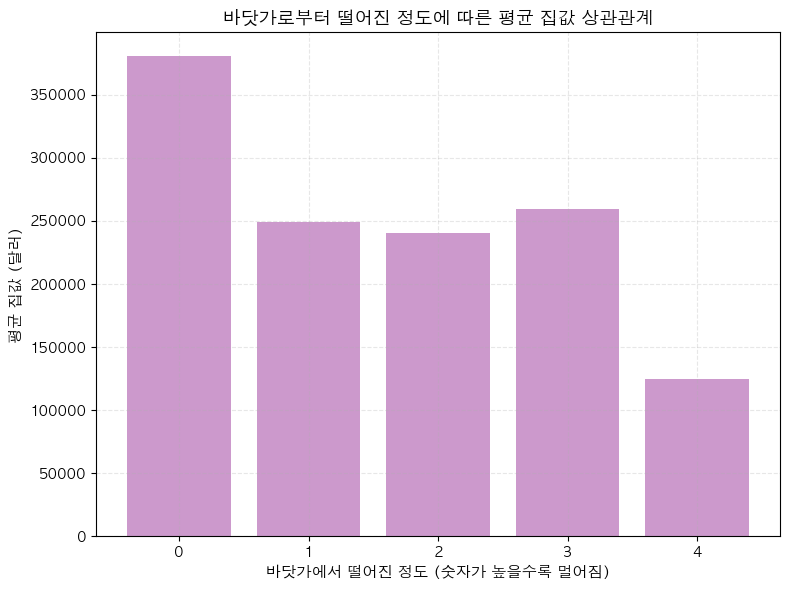

In [18]:
# 바닷가로부터 떨어진 정도에 따른 평균 집값 상관관계
ocean_house_price = clean_df.groupby('ocean_label')['median_house_value'].mean()

plt.figure(figsize=(8,6))
plt.bar(
    ocean_house_price.index, 
    ocean_house_price.values,
    color='purple',
    alpha=0.4,
    linewidth=0.5
)
plt.title('바닷가로부터 떨어진 정도에 따른 평균 집값 상관관계', fontsize=13)
plt.xlabel('바닷가에서 떨어진 정도 (숫자가 높을수록 멀어짐)', fontsize=11)
plt.ylabel('평균 집값 (달러)', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 차트 해석

- 바닷가와 가까워질수록 평균 집값은 올라가는 경향을 보임

- 즉, 우리의 가설(고소득자일수록 바닷가와 가까이 살 것이다)의 근거가 될 수 있을 것으로 보임

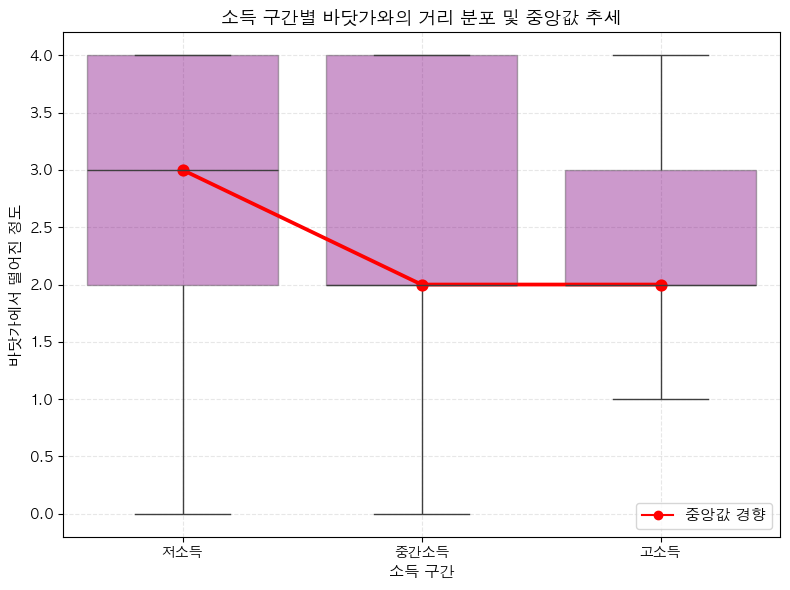

In [19]:
# 박스플롯으로 소득 구간별 ocean_label 재확인

plt.figure(figsize=(8,6))
sns.boxplot(x='income_group', y='ocean_label', data=clean_df, 
            boxprops={'facecolor': 'purple', 'alpha':0.4})

# 포인트플롯: 중앙값 경향선 추가
sns.pointplot(x='income_group', y='ocean_label', data=clean_df, 
              estimator='median', color='red', markers='o', linestyles='-', 
              label='중앙값 경향')
custom_line = Line2D([0], [0], color='red', marker='o', linestyle='-', label='중앙값 경향')
plt.legend(handles=[custom_line], fontsize=11, labels=['중앙값 경향'])

# 그래프 제목과 축 라벨 설정
plt.title('소득 구간별 바닷가와의 거리 분포 및 중앙값 추세', fontsize=13)
plt.xlabel('소득 구간', fontsize=11)
plt.ylabel('바닷가에서 떨어진 정도', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### 차트 해석

- 저소득/중간소득 그룹

  - ocean_label의 중앙값이 3, 즉 'NEAR BAY'에 가까운 지역이 가장 많음을 의미
  - 데이터의 범위(박스와 수염)가 0~4까지 넓게 분포되어 있음
  - 즉, 저소득·중간소득층은 바다가 가까운 지역(0, 1)과 먼 내륙(4)까지 다양한 위치에 분포

- 고소득 그룹
  - ocean_label 값의 중앙값이 상대적으로 낮고, 박스가 2~3에 집중되어 있음
  - 수염(whisker)이 1~4로 좁게 분포되어 있음
  - 즉, 고소득층은 ocean_label이 아주 높은 지역(내륙, 4)이나 아주 낮은 지역(바닷가, 0)에 덜 분포

- 종합해 보면 고소득층은 극단적으로 바다에서 매우 가까운 곳이나 아주 먼 곳보다는 주로 중간 거리(만 근처나 바닷가에서 차로 1시간 이내)에 더 많이 분포하는 경향이 있음

- 즉, 그래프 상으로는 "소득 수준이 높을 수록 바다 가까이 살 것"이라는 우리의 가설이 온전히 맞지는 않지만, "고소득층이 타 그룹에 비해 상대적으로 바다와 더 가까이 사는 경향을 보인다"는 점에서는 우리의 가설이 일부 맞다고 볼 수 있음

# 3. 신뢰구간

In [20]:
# ocean_label별 median_income 평균값을 새 변수에 담기
income_ocean_cat = clean_df.groupby('ocean_label')['median_income'].mean()
income_ocean_cat

ocean_label
0    2.200000
1    3.528969
2    3.756567
3    3.687773
4    2.728591
Name: median_income, dtype: float64

In [21]:
# 표본 평균(xbar), 표본 표준편차(s), n(표본 수), 표준 오차(se) 구하기
xbar = income_ocean_cat.mean()
s = income_ocean_cat.std()
n = len(income_ocean_cat)
se = s / np.sqrt(n)

In [22]:
# t분포의 임계값(tcrit)과 곱해서 95% 신뢰구간(ci_low, ci_high) 계산하기
alpha = 0.05
tcrit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_low, ci_high = xbar - tcrit*se, xbar + tcrit*se

print(f"표본 평균: {xbar:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")


표본 평균: 3.18
95% CI: (2.33, 4.03)


#### 해석

- 해당 표본에서 계산한 95% 신뢰구간(2.33, 4.03)은 모평균이 이 구간에 포함될 것이라고 95% 신뢰
- 동일한 방법으로 표본을 수없이 많이 뽑아 신뢰구간을 반복적으로 구하면, 그 구간들 중 약 95%가 실제 모평균을 포함한다

# 4. 가설 검정

- 우리의 가설: "소득 수준이 높을 수록 바다 가까이에 살 것이다"

## 1) 정규성 검정

- 귀무가설(H0): "데이터가 정규분포를 따른다"
- 대립가설(H1): "데이터가 정규분포를 따르지 않는다"

In [23]:
# 고소득 그룹에 속한 데이터들의 ocean_label 값만 추출
high_group = clean_df[clean_df['income_group']=='고소득']['ocean_label']

# Shapiro-Wilk 정규성 검정
stat, p = stats.shapiro(high_group) 
print("검정 통계량:", stat)
print("p-value:", p)

if p > 0.05:
    print("정규성을 만족한다고 봄 (귀무가설 채택)")
else:
    print("정규성이 깨졌다고 봄 (귀무가설 기각)")

# 검정통계량이 1에 가까울수록 정규성 가정하지만, p값이 0.05보다 훨씬 작으므로 정규성 가정이 깨졌다고 판단
# 이럴 땐 P값 해석이 더 중요

검정 통계량: 0.8011764610016596
p-value: 2.235517738330343e-59
정규성이 깨졌다고 봄 (귀무가설 기각)


In [24]:
# 저소득 그룹에 속한 데이터들의 ocean_label 값만 추출
low_group = clean_df[clean_df['income_group']=='저소득']['ocean_label']

# Shapiro-Wilk 정규성 검정
stat, p = stats.shapiro(high_group) 
print("검정 통계량:", stat)
print("p-value:", p)

if p > 0.05:
    print("정규성을 만족한다고 봄 (귀무가설 채택)")
else:
    print("정규성이 깨졌다고 봄 (귀무가설 기각)")

검정 통계량: 0.8011764610016596
p-value: 2.235517738330343e-59
정규성이 깨졌다고 봄 (귀무가설 기각)


#### 해석

- 두 그룹의 p-value가 유의수준 0.05보다 훨씬 작음 → "데이터가 정규분포를 따른다"는 귀무가설 기각

## 2) 등분산성 검정

- 귀무가설(H0): "두 그룹의 분산이 같다 (분산의 차이가 없다)"
- 대립가설(H1): "두 그룹의 분산이 다르다 (분산의 차이가 있다)"

In [25]:
# Levene 검정
stat, p = stats.levene(high_group, low_group)
print("검정 통계량 =", stat, ", p-value =", p)

if p > 0.05:
    print("등분산 가정 OK")
else:
    print("등분산 가정 깨짐")

검정 통계량 = 1691.0615740960016 , p-value = 0.0
등분산 가정 깨짐


#### 해석

- p-value가 유의수준 0.05보다 훨씬 작음 → "두 그룹의 분산(흩어짐의 정도)이 같다"는 귀무가설 기각
- 일반적인 t-test 부적합 → 비모수 검정 필요

## 3) 비모수 검정
→ 두 집단(high_group, low_group)이 정규성을 따르지 않고, 분산이 같지 않으므로

- 귀무가설(H0): "두 그룹이 바닷가로부터 떨어져 사는 정도는 같다"
- 대립가설(H1): "두 그룹이 바닷가로부터 떨어져 사는 정도는 다르다"



In [26]:
# Wilcoxon rank-sum test (윌콕슨 순위합) 검정
stat, pval = stats.mannwhitneyu(high_group, low_group, alternative='two-sided') # two-sided: 두 그룹이 차이 있는지 검정하는 것이므로

print("Statistic:", stat)
print("p-value:", pval)

Statistic: 12055451.5
p-value: 8.279154509906763e-158


#### 해석

- p-value가 유의수준 0.05보다 훨씬 작음 → "두 그룹이 바닷가로부터 떨어져 사는 정도는 같다"는 귀무가설 기각
- 즉, 고소득 그룹과 저소득 그룹이 바닷가로부터 떨어져 사는 정도의 차이는 유의미함
- 결론적으로, "소득 수준이 높을 수록 바다와 가까이 산다"는 우리의 가설을 일정 부분 뒷받침할 수 있음!

# 5. 다중공선성

In [27]:
X = clean_df[['ocean_label','median_income', 'median_house_value']]
X = sm.add_constant(X)
for i in range(X.shape[1]):
    print(variance_inflation_factor(X.values, i))

16.894570502397418
1.239588529496203
1.8863805952569939
2.206807734107994


#### 해석

- 첫 번째 값(16.89): 상수항(절편)의 VIF이므로 무시

- 두 번재 값(1.23..): ocean_label의 VIF (자기자신이므로 무시)

- 세 번째 값(1.88..): median_income 변수의 VIF

- 네 번째 값(2.20..): median_house_value 변수의 VIF

- 세 변수(ocean_label, median_income, median_house_value)의 VIF가 모두 5 미만이므로, 다중공선성 문제는 없는 것으로 볼 수 있음

- 즉, 독립변수(소득, 주택가격)는 서로 높은 상관관계 없이 독립적으로 해석이 가능하고, 회귀분석에 다중공선성의 큰 문제가 없음

# 6. 회귀

## 1) 단순 선형 회귀

In [28]:
import statsmodels.api as sm

X = clean_df['median_income']
y = clean_df['ocean_label']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ocean_label   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     838.9
Date:                Fri, 17 Oct 2025   Prob (F-statistic):          7.75e-181
Time:                        01:01:06   Log-Likelihood:                -30139.
No. Observations:               20640   AIC:                         6.028e+04
Df Residuals:                   20638   BIC:                         6.030e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9854      0.015    203.649

#### 해석

- 설명력(R-squared)
  - R-squared 값(0.039)이 매우 낮아서, 소득만으로 바닷가 거리 카테고리를 설명하는 힘은 매우 제한적
  - 즉, 소득 외에 다른 요인이 영향이 크거나 데이터가 분산이 크다는 의미​

- 회귀계수
  - median_income의 계수(-0.1087)는 중위소득이 1 단위 증가하면 바닷가와의 거리 'ocean_label'이 평균 0.1087만큼 더 낮아진다는 뜻 
  - 즉, 소득이 높을수록 바다 가까운 곳에 살 경향이 있다는 의미

- 통계적 유의성
  - median_income의 P>|t| 값(0.000)이 매우 작으므로, 이 관계는 유의미하다고 볼 수 있음

- 결론
  - 통계적으로는 소득이 높을수록 바닷가 가까이 살 가능성이 유의미하게 증가하지만, 실제 설명력이나 예측력은 낮음
  - 소득만 가지고 바닷가 거주 경향을 완전히 예측할 수는 없음

## 2) 다중 회귀

In [29]:
X = clean_df[['median_income', 'median_house_value']]
y = clean_df['ocean_label']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ocean_label   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2472.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:01:06   Log-Likelihood:                -28334.
No. Observations:               20640   AIC:                         5.667e+04
Df Residuals:                   20637   BIC:                         5.670e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3271      0

#### 해석

- R-squared 0.193
  - 두 설명변수(소득, 집값)가 ocean_label 변동의 약 19.3%만 설명
  - 단순회귀보다 설명력 상승은 있으나, 여전히 예측력은 제한적임.

- 회귀계수
  - median_income 계수(0.0908)는 소득이 1만큼 오르면 ocean_label이 약 0.09 증가한다는 뜻 → 소득이 높을수록 해변에서 약간 멀어지는 경향
  - median_house_value 계수(-4.9e-6)는 집값이 1만큼 오르면 ocean_label이 아주 미세하게 감소한다는 뜻 → 해변에 가까워질수록 집값이 오르는 경향

- 통계적 유의성
  - 모든 p값(유의확률)이 0.000으로, 두 변수 모두 통계적으로 유의함

- Cond. No.(Condition Number)
  - 50,000 이상이면 다중공선성 의심할 수 있는데, 여기선 520,000으로 상당히 높은 수준으로 보일 수 있지만, 실제 상관관계가 높은 게 아니라 단위 차이 때문에 Cond. No.가 커진 것
  - 두 변수(median_income, median_house_value)의 단위 차이(만 달러 vs 수십만 달러)가 너무 달라서 수치적으로 불안정해 보이는 것 뿐

- 결론
  - 두 독립변수 모두 ocean_label에 미치는 영향이 통계적으로는 매우 유의미함
  - 소득이 높을수록 해변에서 약간 더 멀어질 가능성이 있으나, 주택가격이 높을수록 오히려 해변 가까운 위치에 있을 확률이 커짐
  - 두 변수 모두 실제 ocean_label 변동을 완전히 설명하지는 못하지만, 두 변수의 연관성이 통계적으로 확인됨

# 7. 인사이트 도출

- 소득이 높을수록 바다 가까이에 사는 경향은 있지만, '집값'이 더 직접적인 결정 요인이다.
- 고소득자들이 반드시 해안가에 사는 건 아니지만, ‘비싼 집이 있는 곳(=바다 근처)’에 사는 사람이 많다.
- 결국 소득 → 비싼 집 구매 → 바다 근처 거주의 간접 경로로 이어지는 패턴을 보인다.

# 8. 비즈니스 적용 가능성

- 건물주 입장: 가능하면 해안가에 집을 지어 수익을 올리고, 고객들에게는 오션뷰와 바다 근접성을 매력 포인트로 어필하자.
- 세입자 입장: 저렴한 집을 찾는다면, 해안가는 피하자.
- 정부 입장: 집값을 내리기 위해서는 해안가를 중심으로 부동산 정책을 시행하고, 해안가 건물주들에게 더 높은 세금을 부과해 집값 균형을 맞추자.